In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../data/Dataset4.csv')

In [4]:
data.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,No
5,5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,No
6,6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,No
7,7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,No
8,8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,No
9,9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,No


In [5]:
data.drop("Unnamed: 0",axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62484 non-null  float64
 2   Humidity[%]     62383 non-null  float64
 3   TVOC[ppb]       62009 non-null  float64
 4   eCO2[ppm]       62305 non-null  float64
 5   Raw H2          62519 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62603 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62313 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62378 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.2+ MB


In [7]:
data= data.rename(columns = {"Fire Alarm" : "Fire_Alarm",
                            "Raw H2" : "Raw_H2",
                            "Raw Ethanol" : "Raw_Ethanol"})

In [8]:
len(sorted (data['UTC'].unique()))

62630

In [9]:
data.dropna(inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60603 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             60603 non-null  int64  
 1   Temperature[C]  60603 non-null  float64
 2   Humidity[%]     60603 non-null  float64
 3   TVOC[ppb]       60603 non-null  float64
 4   eCO2[ppm]       60603 non-null  float64
 5   Raw_H2          60603 non-null  float64
 6   Raw_Ethanol     60603 non-null  int64  
 7   Pressure[hPa]   60603 non-null  float64
 8   PM1.0           60603 non-null  float64
 9   PM2.5           60603 non-null  float64
 10  NC0.5           60603 non-null  float64
 11  NC1.0           60603 non-null  float64
 12  NC2.5           60603 non-null  float64
 13  CNT             60603 non-null  int64  
 14  Fire_Alarm      60603 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.4+ MB


In [11]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,6.060300e+04,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000,60603.000000
mean,1.654792e+09,15.969422,48.530699,1940.224296,670.565731,12942.483507,19754.829381,938.626170,100.456575,184.535487,489.985977,203.690792,80.250339,10504.482121
std,1.101285e+05,14.364021,8.885096,7803.365405,1910.834428,272.409853,609.240337,1.334196,922.971678,1980.884024,4263.976415,2220.198260,1087.865967,7594.776939
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.980000,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.330000,8.795000,1.381500,0.033000,3622.000000
50%,1.654762e+09,20.130000,50.140000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9323.000000
75%,1.654778e+09,25.410000,53.240000,1189.000000,438.000000,13109.000000,20079.000000,939.417000,2.090000,2.180000,14.420000,2.249000,0.051000,17149.500000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


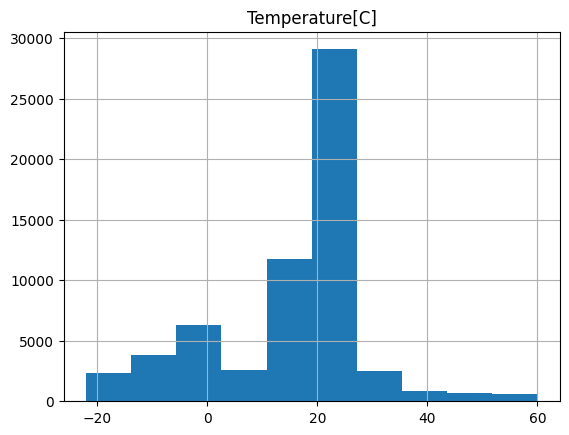

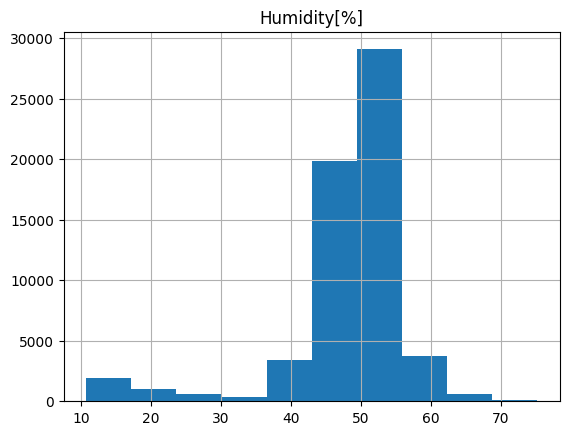

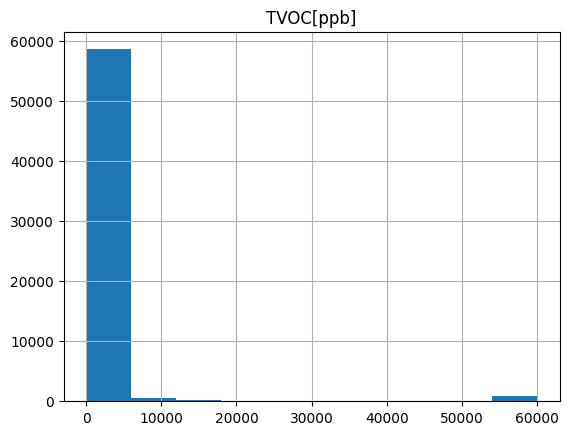

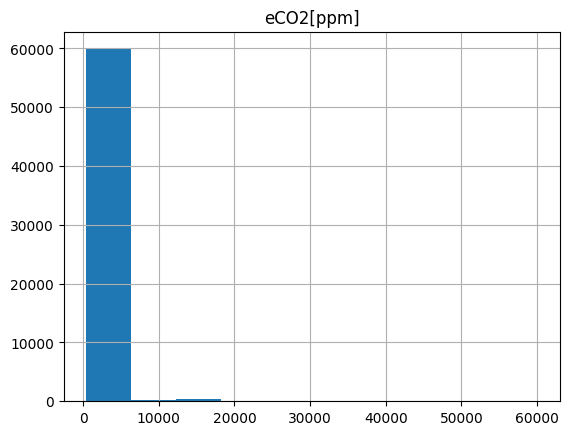

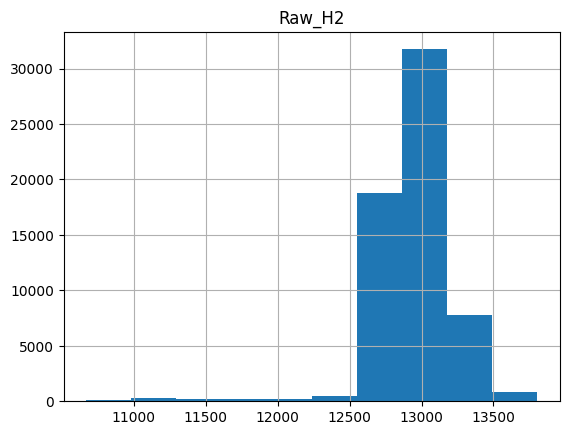

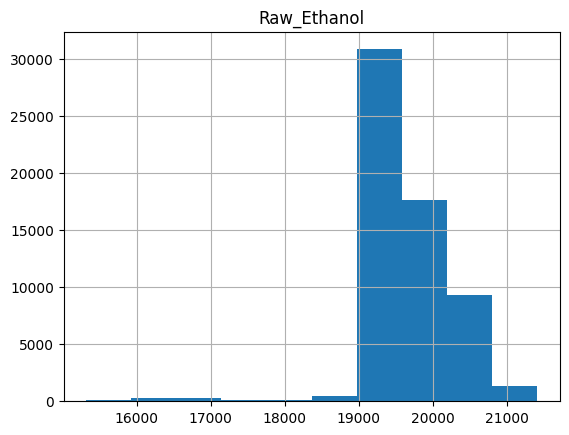

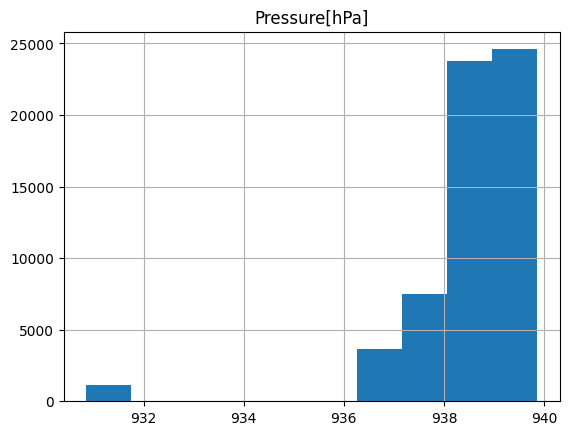

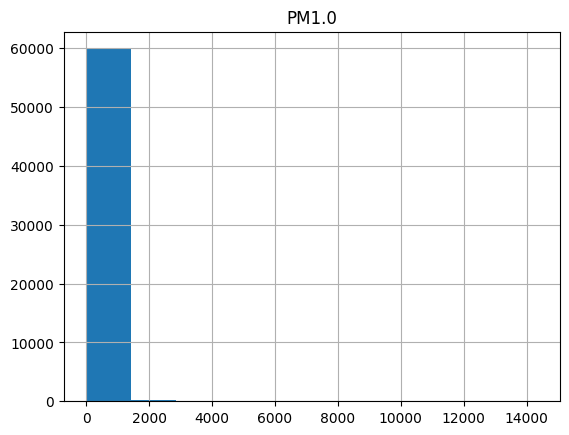

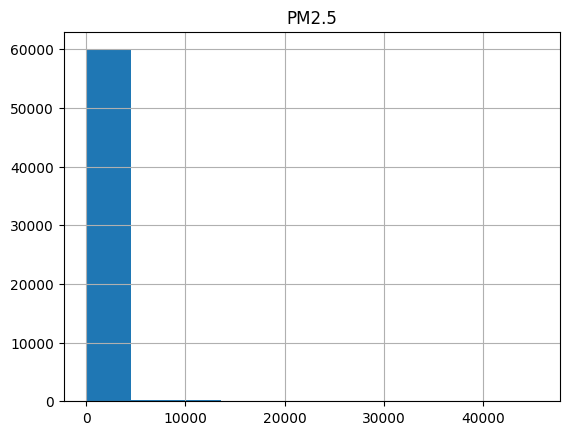

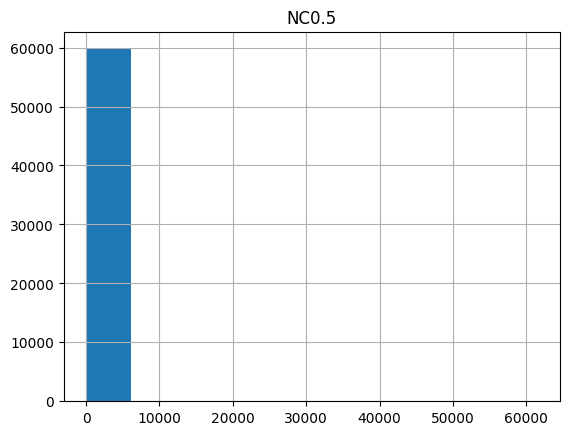

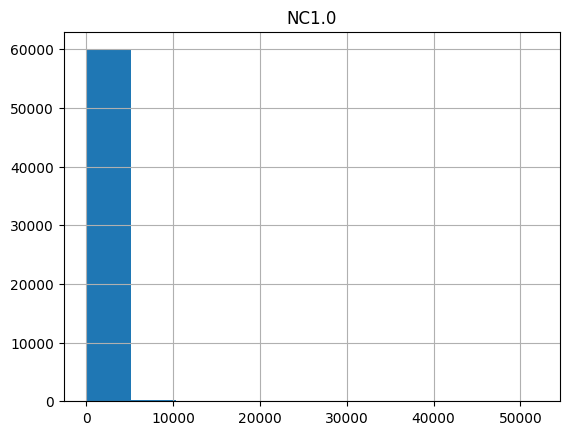

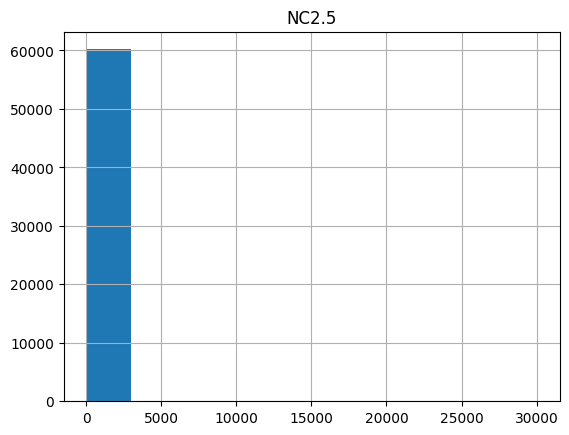

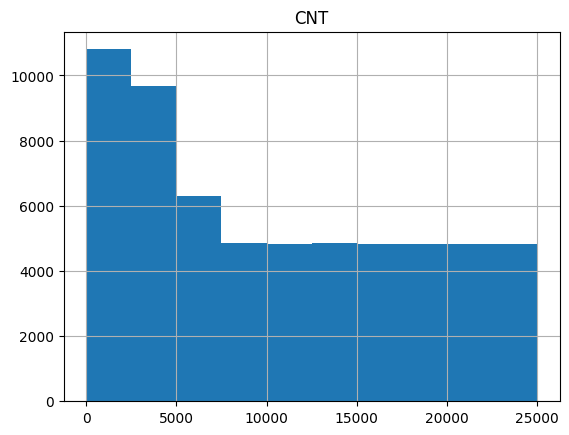

In [12]:
columns = ['Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT']
for column in columns:
    data.hist(column)

In [13]:
outlier = data[['Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT']]
outlier

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [14]:
Q1 = outlier.quantile(0.25)
Q1

Temperature[C]       10.9800
Humidity[%]          47.5300
TVOC[ppb]           130.0000
eCO2[ppm]           400.0000
Raw_H2            12830.0000
Raw_Ethanol       19435.0000
Pressure[hPa]       938.7000
PM1.0                 1.2800
PM2.5                 1.3300
NC0.5                 8.7950
NC1.0                 1.3815
NC2.5                 0.0330
CNT                3622.0000
Name: 0.25, dtype: float64

In [15]:
Q3 = outlier.quantile(0.75)
Q3

Temperature[C]       25.410
Humidity[%]          53.240
TVOC[ppb]          1189.000
eCO2[ppm]           438.000
Raw_H2            13109.000
Raw_Ethanol       20079.000
Pressure[hPa]       939.417
PM1.0                 2.090
PM2.5                 2.180
NC0.5                14.420
NC1.0                 2.249
NC2.5                 0.051
CNT               17149.500
Name: 0.75, dtype: float64

In [16]:
IQR = Q3-Q1

In [17]:
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
238,23.035,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238
239,23.045,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239
240,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240
247,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247
248,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51227,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85
51229,29.160,41.35,31.0,413.0,12864.0,20766,937.625,2.19,2.27,15.07,2.350,0.053,87
56967,24.173,44.99,17.0,415.0,12863.0,20774,937.630,2.18,2.26,15.00,2.340,0.053,81
56968,24.212,45.00,27.0,426.0,12853.0,20763,937.634,2.18,2.26,15.00,2.339,0.053,82


In [18]:
index_list = list(data_filtered.index.values)

In [19]:
data_filtered = data[data.index.isin(index_list)].copy()
data_filtered.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
238,1654733569,23.035,51.58,2.0,400.0,12622.0,19693,939.807,0.07,0.12,0.36,0.131,0.047,238,No
239,1654733570,23.045,51.37,3.0,400.0,12626.0,19690,939.817,0.08,0.14,0.42,0.151,0.055,239,No
240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,No
247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,No
248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,No


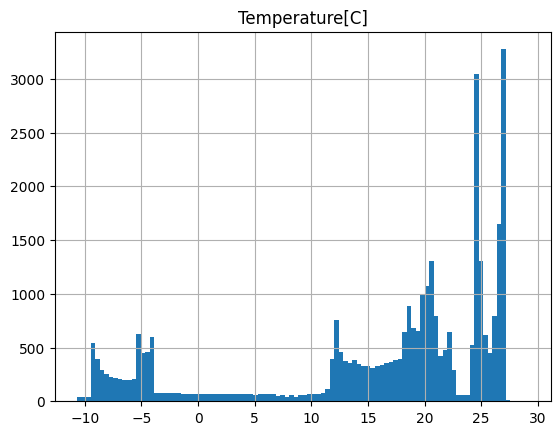

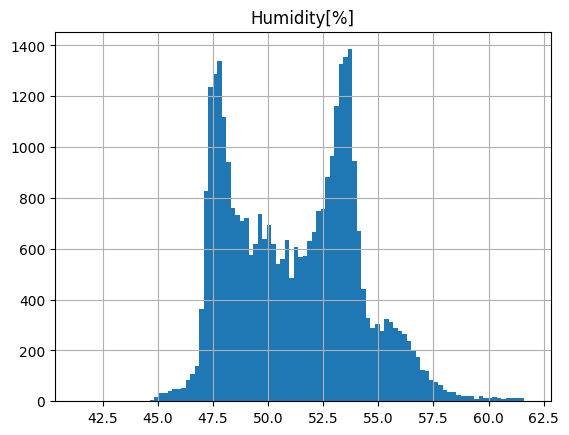

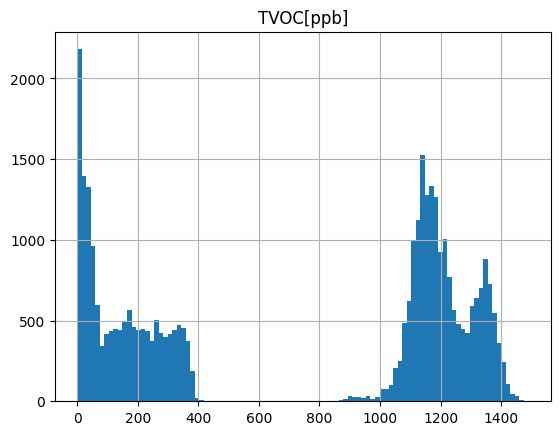

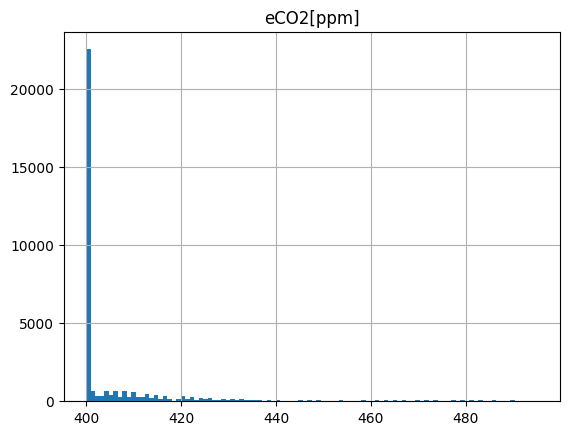

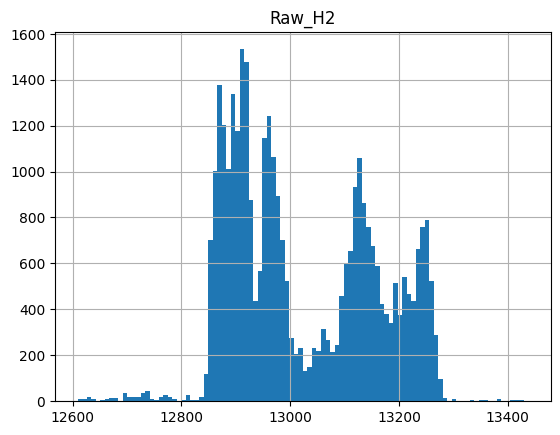

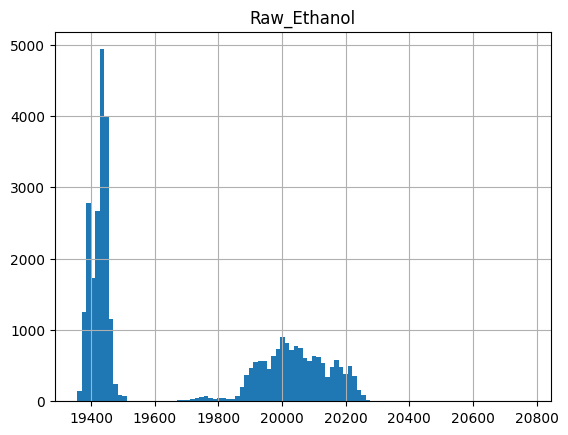

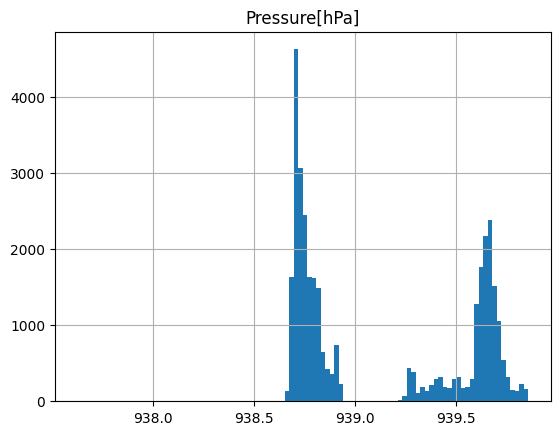

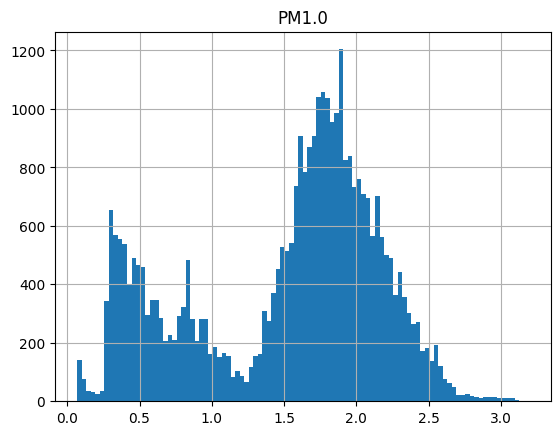

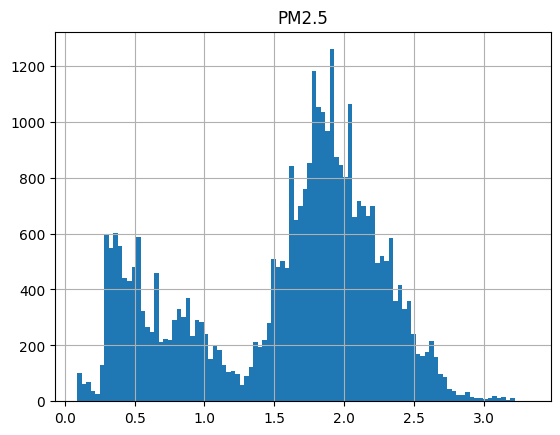

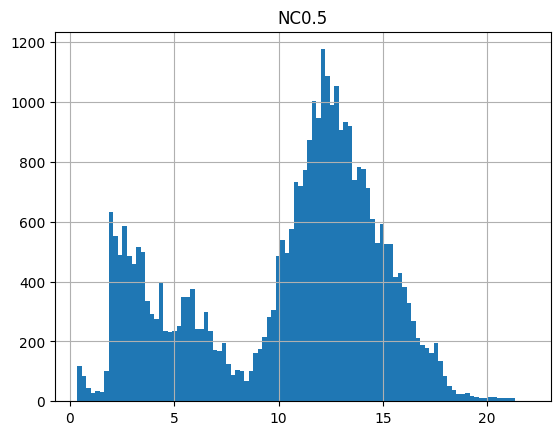

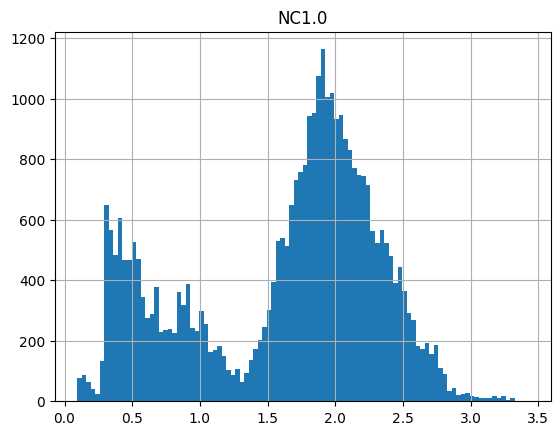

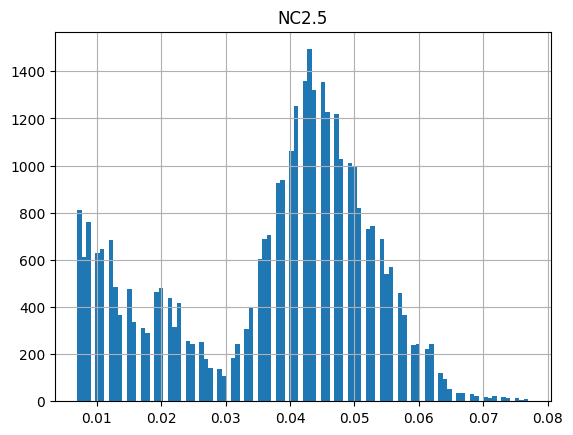

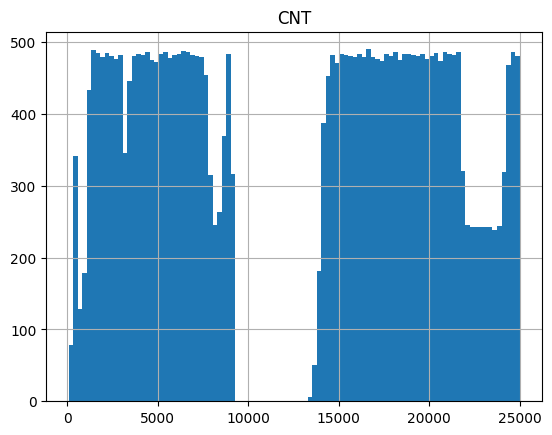

In [20]:
filtered_outlier = data_filtered[['Temperature[C]',	'Humidity[%]',	'TVOC[ppb]',	'eCO2[ppm]',	'Raw_H2',	'Raw_Ethanol',	'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5',	'NC1.0',	'NC2.5',	'CNT']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

[[<Axes: title={'center': 'Temperature[C]'}>]]
[[<Axes: title={'center': 'Temperature[C]'}>]]


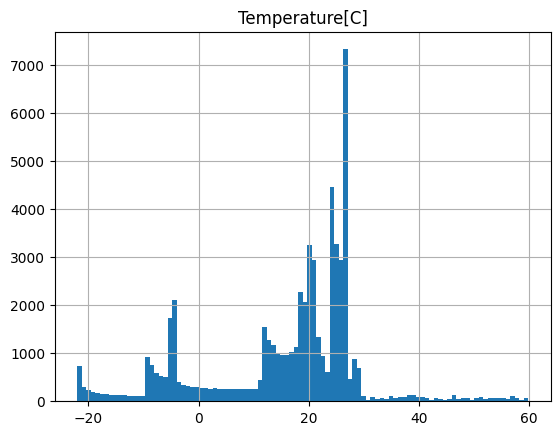

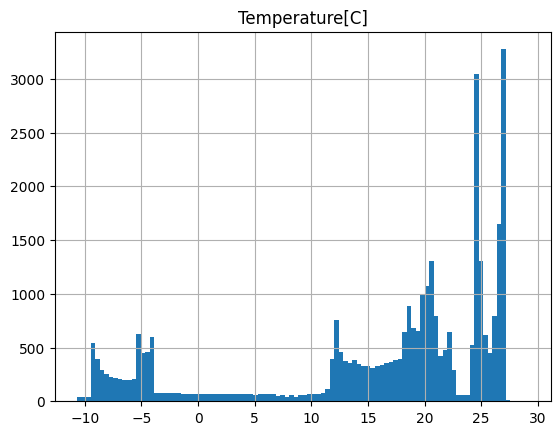

In [21]:
print (data.hist('Temperature[C]', bins=100));
print (data_filtered.hist('Temperature[C]', bins=100));

[[<Axes: title={'center': 'Humidity[%]'}>]]
[[<Axes: title={'center': 'Humidity[%]'}>]]


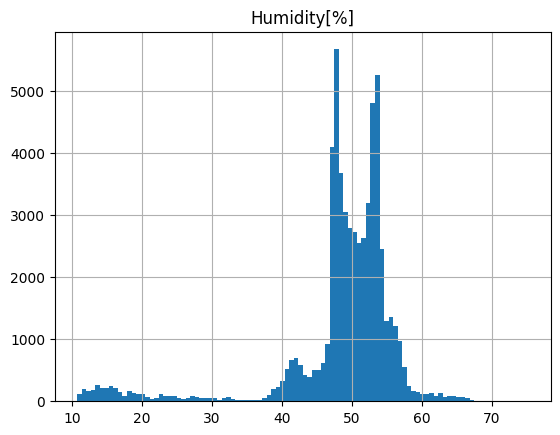

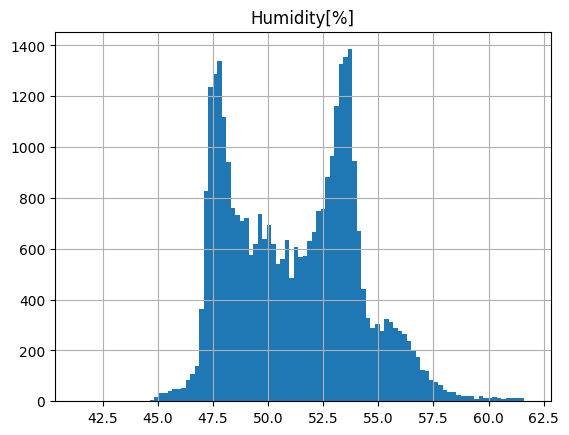

In [22]:
print (data.hist('Humidity[%]', bins=100));
print (data_filtered.hist('Humidity[%]', bins=100));

In [23]:
data_filtered[['Temperature[C]', 'Humidity[%]',	'TVOC[ppb]', 'eCO2[ppm]', 'Raw_H2', 'Raw_Ethanol', 'Pressure[hPa]',	'PM1.0',	'PM2.5',
           'NC0.5', 'NC1.0', 'NC2.5', 'CNT']].corr()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
Temperature[C],1.000000,-0.170483,0.338394,0.162835,-0.387456,-0.385893,-0.343231,0.084017,0.084297,0.083943,0.084321,0.091702,0.271197
Humidity[%],-0.170483,1.000000,-0.233052,-0.128786,0.168060,0.223246,0.243738,-0.241674,-0.241567,-0.241658,-0.241562,-0.231217,-0.211035
TVOC[ppb],0.338394,-0.233052,1.000000,0.377081,-0.817936,-0.975850,-0.979486,0.471068,0.470860,0.471158,0.470819,0.446811,0.963738
eCO2[ppm],0.162835,-0.128786,0.377081,1.000000,-0.473555,-0.386143,-0.328940,0.233538,0.233492,0.233525,0.233538,0.226730,0.233373
Raw_H2,-0.387456,0.168060,-0.817936,-0.473555,1.000000,0.904906,0.814774,-0.148250,-0.149841,-0.147683,-0.150083,-0.209773,-0.692449
Raw_Ethanol,-0.385893,0.223246,-0.975850,-0.386143,0.904906,1.000000,0.958080,-0.374023,-0.374416,-0.373891,-0.374468,-0.378073,-0.913756
Pressure[hPa],-0.343231,0.243738,-0.979486,-0.328940,0.814774,0.958080,1.000000,-0.440308,-0.439924,-0.440466,-0.439844,-0.409158,-0.948850
PM1.0,0.084017,-0.241674,0.471068,0.233538,-0.148250,-0.374023,-0.440308,1.000000,0.999963,0.999988,0.999966,0.967780,0.490744
PM2.5,0.084297,-0.241567,0.470860,0.233492,-0.149841,-0.374416,-0.439924,0.999963,1.000000,0.999957,0.999990,0.969270,0.490385
NC0.5,0.083943,-0.241658,0.471158,0.233525,-0.147683,-0.373891,-0.440466,0.999988,0.999957,1.000000,0.999958,0.967235,0.490877


In [24]:
avg_price = data_filtered.pivot_table(index='Fire_Alarm', values='Temperature[C]', aggfunc='mean')
avg_price.sort_values(ascending=False ,by='Fire_Alarm')


,Temperature[C]
Fire_Alarm,
Yes,15.452128
No,19.270072


In [25]:
YesFire = data_filtered.query('Fire_Alarm == "Yes"')
NoFire = data_filtered.query('Fire_Alarm == "No"')

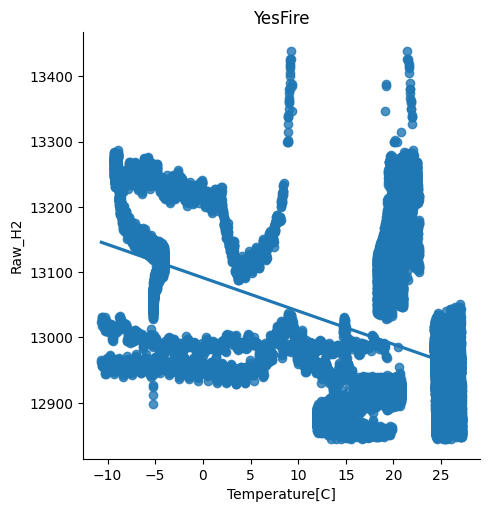

In [26]:
sns.lmplot(x='Temperature[C]', y = 'Raw_H2',data = YesFire);
plt.title("YesFire");

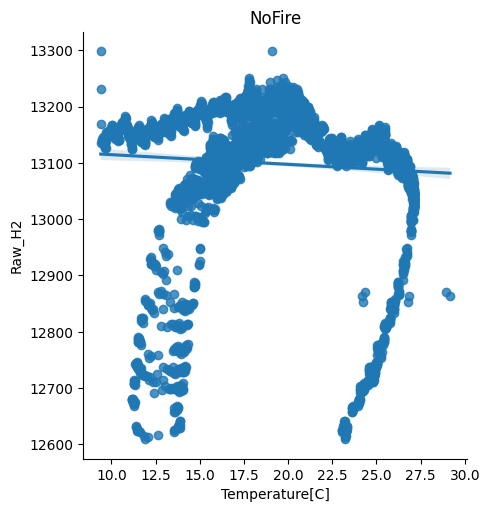

In [27]:
sns.lmplot(x='Temperature[C]', y = 'Raw_H2',data = NoFire);
plt.title("NoFire");

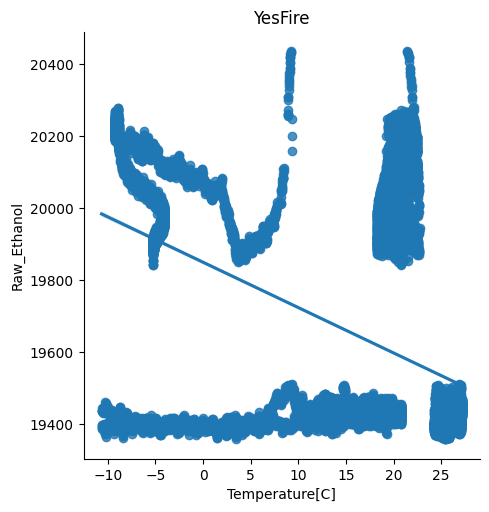

In [28]:
sns.lmplot(x='Temperature[C]', y = 'Raw_Ethanol',data = YesFire);
plt.title("YesFire");

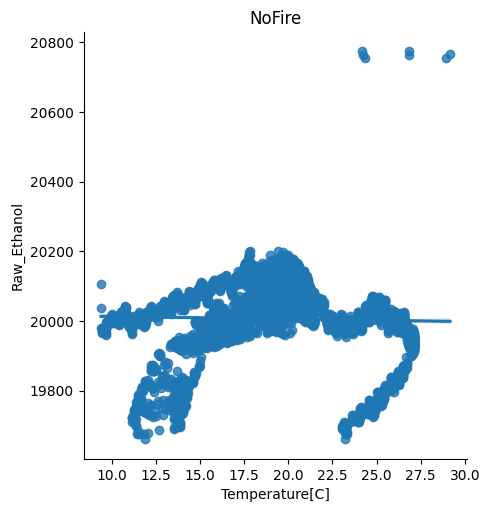

In [29]:
sns.lmplot(x='Temperature[C]', y = 'Raw_Ethanol',data = NoFire);
plt.title("NoFire");

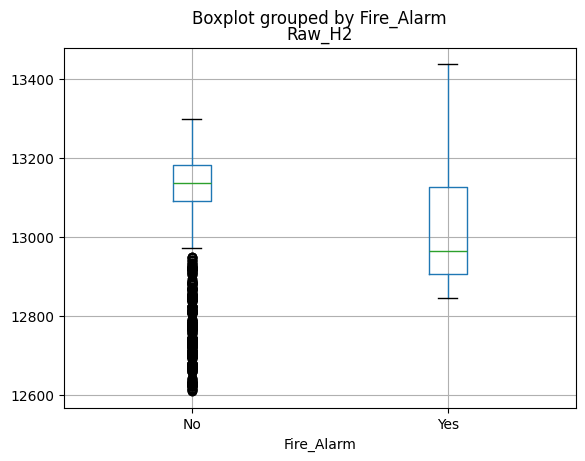

In [30]:
data_filtered.boxplot(by='Fire_Alarm',column='Raw_H2');

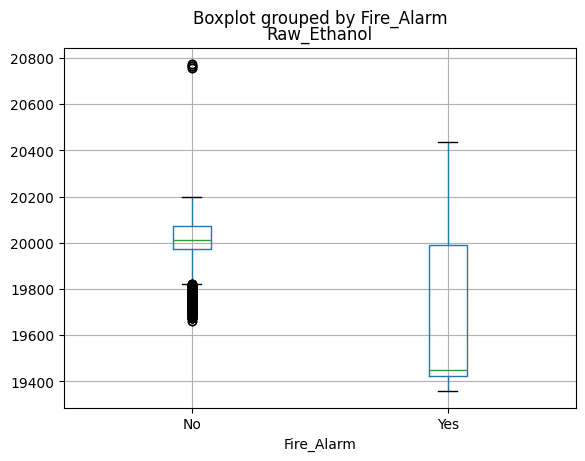

In [31]:
data_filtered.boxplot(by='Fire_Alarm',column='Raw_Ethanol');

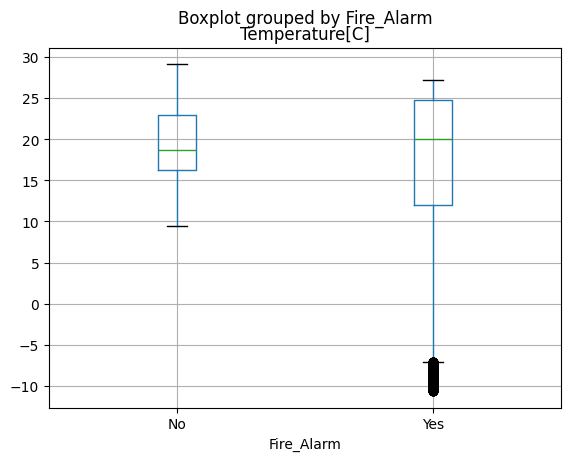

In [32]:
data_filtered.boxplot(by='Fire_Alarm',column='Temperature[C]');

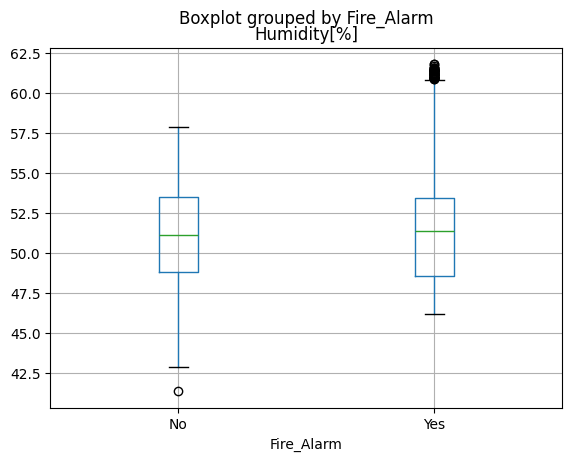

In [33]:
data_filtered.boxplot(by='Fire_Alarm',column='Humidity[%]');

In [34]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34520 entries, 238 to 56971
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             34520 non-null  int64  
 1   Temperature[C]  34520 non-null  float64
 2   Humidity[%]     34520 non-null  float64
 3   TVOC[ppb]       34520 non-null  float64
 4   eCO2[ppm]       34520 non-null  float64
 5   Raw_H2          34520 non-null  float64
 6   Raw_Ethanol     34520 non-null  int64  
 7   Pressure[hPa]   34520 non-null  float64
 8   PM1.0           34520 non-null  float64
 9   PM2.5           34520 non-null  float64
 10  NC0.5           34520 non-null  float64
 11  NC1.0           34520 non-null  float64
 12  NC2.5           34520 non-null  float64
 13  CNT             34520 non-null  int64  
 14  Fire_Alarm      34520 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 4.2+ MB


In [35]:
data_filtered = data_filtered.sort_values(by = "Temperature[C]")
data_filtered

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw_H2,Raw_Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
24164,1654757495,-10.656,52.25,1184.0,400.0,13023.0,19437,938.759,1.88,1.95,12.94,2.018,0.046,24164,Yes
21840,1654755171,-10.654,54.13,1350.0,408.0,12965.0,19397,938.729,1.44,1.49,9.89,1.542,0.035,21840,Yes
21839,1654755170,-10.639,54.11,1337.0,405.0,12962.0,19395,938.730,1.44,1.50,9.93,1.548,0.035,21839,Yes
24165,1654757496,-10.632,52.34,1178.0,400.0,13032.0,19436,938.764,1.92,2.00,13.24,2.064,0.047,24165,Yes
21838,1654755169,-10.624,54.05,1348.0,408.0,12957.0,19387,938.720,1.44,1.50,9.91,1.546,0.035,21838,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39364,1654775713,27.180,46.92,1124.0,478.0,12858.0,19445,938.918,1.71,1.78,11.77,1.835,0.041,14370,Yes
38764,1654775113,27.190,46.83,1117.0,494.0,12849.0,19442,938.893,1.94,2.01,13.33,2.078,0.047,13770,Yes
40504,1654776853,27.190,47.05,1145.0,438.0,12877.0,19442,938.826,1.50,1.56,10.34,1.612,0.036,15510,Yes
51227,1654712272,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85,No


In [36]:
columns_to_select = ['Temperature[C]','eCO2[ppm]', 'PM1.0',	'PM2.5',"Fire_Alarm","UTC"]
alarm = data_filtered.loc[:, columns_to_select]
alarm.head()

,Temperature[C],eCO2[ppm],PM1.0,PM2.5,Fire_Alarm,UTC
24164,-10.656,400.0,1.88,1.95,Yes,1654757495
21840,-10.654,408.0,1.44,1.49,Yes,1654755171
21839,-10.639,405.0,1.44,1.50,Yes,1654755170
24165,-10.632,400.0,1.92,2.00,Yes,1654757496
21838,-10.624,408.0,1.44,1.50,Yes,1654755169


In [37]:
alarm["Temperature[C]"].unique()

array([-10.656, -10.654, -10.639, ...,  27.19 ,  28.91 ,  29.16 ])

## Lineral Regression

In [38]:
from sklearn.preprocessing import OrdinalEncoder
item_temp_categories = [np.asarray(alarm["Temperature[C]"].unique())]
ordinal_features = ["Temperature[C]"]
ordinal_encoder = OrdinalEncoder(categories=item_temp_categories)

In [39]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['eCO2[ppm]','PM1.0','PM2.5']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [40]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features),
     ('cat', categorical_encoder, categorical_features)
     ])
# Получите закодированные функции в виде DataFrame.
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(alarm)
encoded_features.head(10)

,ord__Temperature[C],cat__eCO2[ppm]_400.0,cat__eCO2[ppm]_401.0,cat__eCO2[ppm]_402.0,cat__eCO2[ppm]_403.0,cat__eCO2[ppm]_404.0,cat__eCO2[ppm]_405.0,cat__eCO2[ppm]_406.0,cat__eCO2[ppm]_407.0,cat__eCO2[ppm]_408.0,...,cat__PM2.5_3.14,cat__PM2.5_3.15,cat__PM2.5_3.16,cat__PM2.5_3.18,cat__PM2.5_3.2,cat__PM2.5_3.21,cat__PM2.5_3.22,cat__PM2.5_3.23,cat__PM2.5_3.26,cat__PM2.5_3.32
24164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21839,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24165,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21838,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24166,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21837,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21836,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24167,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21834,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(alarm['Fire_Alarm'])
encoded_alarm = encoded_features.assign(Fire_Alarm=encoded_label)
encoded_alarm.head()

,ord__Temperature[C],cat__eCO2[ppm]_400.0,cat__eCO2[ppm]_401.0,cat__eCO2[ppm]_402.0,cat__eCO2[ppm]_403.0,cat__eCO2[ppm]_404.0,cat__eCO2[ppm]_405.0,cat__eCO2[ppm]_406.0,cat__eCO2[ppm]_407.0,cat__eCO2[ppm]_408.0,...,cat__PM2.5_3.15,cat__PM2.5_3.16,cat__PM2.5_3.18,cat__PM2.5_3.2,cat__PM2.5_3.21,cat__PM2.5_3.22,cat__PM2.5_3.23,cat__PM2.5_3.26,cat__PM2.5_3.32,Fire_Alarm
24164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21839,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
24165,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21838,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [42]:
list(label_encoder.inverse_transform([0, 1]))

['No', 'Yes']

In [43]:
X = encoded_alarm[encoded_alarm.columns.difference(["Fire_Alarm"])]
y = encoded_alarm["Fire_Alarm"]

In [44]:
y

24164    1
21840    1
21839    1
24165    1
21838    1
        ..
39364    1
38764    1
40504    1
51227    0
51229    0
Name: Fire_Alarm, Length: 34520, dtype: int32

In [45]:
X

,cat__PM1.0_0.07,cat__PM1.0_0.08,cat__PM1.0_0.09,cat__PM1.0_0.1,cat__PM1.0_0.11,cat__PM1.0_0.12,cat__PM1.0_0.13,cat__PM1.0_0.14,cat__PM1.0_0.15,cat__PM1.0_0.16,...,cat__eCO2[ppm]_487.0,cat__eCO2[ppm]_488.0,cat__eCO2[ppm]_489.0,cat__eCO2[ppm]_490.0,cat__eCO2[ppm]_491.0,cat__eCO2[ppm]_492.0,cat__eCO2[ppm]_493.0,cat__eCO2[ppm]_494.0,cat__eCO2[ppm]_495.0,ord__Temperature[C]
24164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
24165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12497.0
38764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12498.0
40504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12498.0
51227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12499.0


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27616, 712), (27616,), (6904, 712), (6904,))

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [49]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
parameters = {'alpha': np.arange(0, 1.1, 0.1)}

In [51]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       907
           1       0.96      0.96      0.96      5997

    accuracy                           0.93      6904
   macro avg       0.85      0.86      0.85      6904
weighted avg       0.93      0.93      0.93      6904

Predicted labels:  [1 1 1 ... 1 1 1]
F1-score:  0.9612817089452603


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 680,  227],
       [ 237, 5760]], dtype=int64)

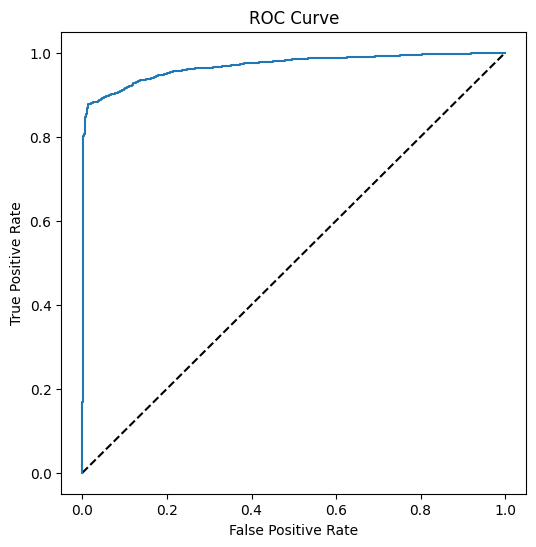

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [54]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.968725634408531


## KNN

In [55]:
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [56]:
data_train, data_test = train_test_split(alarm, test_size = 0.2)

In [57]:
columns = ['Temperature[C]','eCO2[ppm]', 'PM1.0',	'PM2.5']
max_nn = data_train.groupby('Fire_Alarm').count()['UTC'].min()
knn10 = KNeighborsClassifier(n_neighbors=10)
knn100 = KNeighborsClassifier(n_neighbors=100)
knn1000 = KNeighborsClassifier(n_neighbors=1000)
knn10000 = KNeighborsClassifier(n_neighbors=10000)
knnmax = KNeighborsClassifier(n_neighbors = max_nn)

In [58]:
y = alarm['Fire_Alarm']
x = pd.DataFrame(alarm, columns=columns)
knn10.fit(x,y)
knn100.fit(x,y)
knn1000.fit(x,y)
knn10000.fit(x,y)
knnmax.fit(x,y)

KNeighborsClassifier(n_neighbors=3796)

In [59]:
data_test=pd.DataFrame(data_test)
x_test=pd.DataFrame(data_test, columns=columns)
data_test['target_10'] = knn10.predict(x_test)
data_test['target_100'] = knn100.predict(x_test)
data_test['target_1000'] = knn1000.predict(x_test)
data_test['target_10000'] = knn10000.predict(x_test)
data_test['target_max']=knnmax.predict(x_test)

In [60]:
print('kNN, 10:', cohen_kappa_score(data_test['target_10'],data_test['Fire_Alarm'], weights='quadratic'))
print('kNN, 100:', cohen_kappa_score(data_test['target_100'],data_test['Fire_Alarm'], weights='quadratic'))
print('kNN, 1000:', cohen_kappa_score(data_test['target_1000'],data_test['Fire_Alarm'], weights='quadratic'))
print('kNN, 10000:', cohen_kappa_score(data_test['target_10000'],data_test['Fire_Alarm'], weights='quadratic'))
print('kNN, max:', cohen_kappa_score(data_test['target_max'],data_test['Fire_Alarm'], weights='quadratic'))

kNN, 10: 0.9445369812899798
kNN, 100: 0.9253779605218715
kNN, 1000: 0.8059287048200247
kNN, 10000: 0.0
kNN, max: 0.30378082277793095


In [61]:
print (f1_score(data_test['target_10'], data_test['Fire_Alarm'], average='weighted'))
print (f1_score(data_test['target_100'], data_test['Fire_Alarm'], average='weighted'))
print (f1_score(data_test['target_1000'], data_test['Fire_Alarm'], average='weighted'))
print (f1_score(data_test['target_10000'], data_test['Fire_Alarm'], average='weighted'))

0.9868046873603464
0.9827767779110194
0.9580843564592034
0.92619954895404


In [62]:
print (confusion_matrix(data_test['target_10'], data_test['Fire_Alarm']))
print (confusion_matrix(data_test['target_10000'], data_test['Fire_Alarm']))

[[ 906   48]
 [  43 5907]]
[[   0    0]
 [ 949 5955]]


## Naibe Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
x = alarm.iloc[:, [0, 1]].values
y = alarm.iloc[:, 4].values

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [66]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [67]:
x_train

array([[ 0.58320826, -0.456089  ],
       [ 0.77790031, -0.456089  ],
       [ 0.81456079,  0.99973646],
       ...,
       [ 0.94981303, -0.456089  ],
       [ 0.50090016, -0.456089  ],
       [-1.92705558, -0.456089  ]])

In [68]:
y_train

array(['Yes', 'No', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [69]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [70]:
y_pred = classifier.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [72]:
print(cm)

[[1144    2]
 [3102 4382]]


In [73]:
print(f1_score(y_test, y_pred, average='weighted'))

0.6967430143636024


In [74]:
import matplotlib.pyplot as mtp
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.1))

In [84]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).reshape(X1.shape)

array([['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'],
       ...,
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes']], dtype='<U3')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

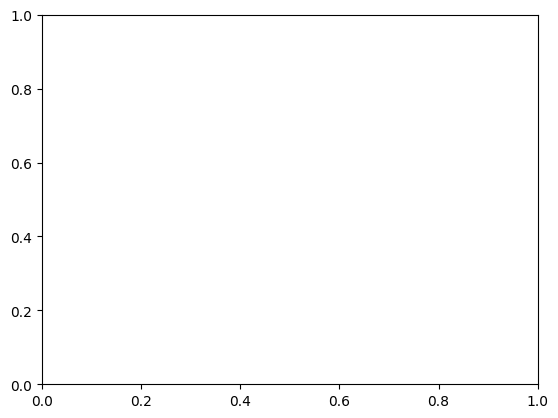

In [85]:
mtp.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))

In [ ]:
 м 8г  ь  
mtp.xlim(X1.min(), X1.max())
mtp.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('purple', 'green'))(i), label = j)
mtp.title('Naive Bayes (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()